<a href="https://colab.research.google.com/github/Samikshab99/Global-Terrorism-Analysis-EDA/blob/main/Copy_of_Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

In [10]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [7]:
path = '/content/drive/MyDrive/'

In [14]:
df=pd.read_csv('/content/drive/MyDrive/Global Terrorism Analysis EDA/Global Terrorism Data.csv',encoding="ISO-8859-1")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
data = pd.read_csv(path + 'Global Terrorism Data.csv', encoding='latin-1')
data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [84]:
#Number of Attacks happened in 1970 and 2017
iyear=data.iyear.value_counts().to_dict()

print('The number of attacks happended in 1970 are',iyear[1970],'& the number of attacks happended in 2017 are ',iyear[2017])

# Number  of Attack  increased from 1970 till 2017 in percentage
rate=((iyear[2017]-iyear[1970])/iyear[2017])*100
print('So we can see that the number of attack from 1970 till 2017 has increased by ',np.round(rate,0))

The number of attacks happended in 1970 are 651 & the number of attacks happended in 2017 are  10900
So we can see that the number of attack from 1970 till 2017 has increased by  94.0


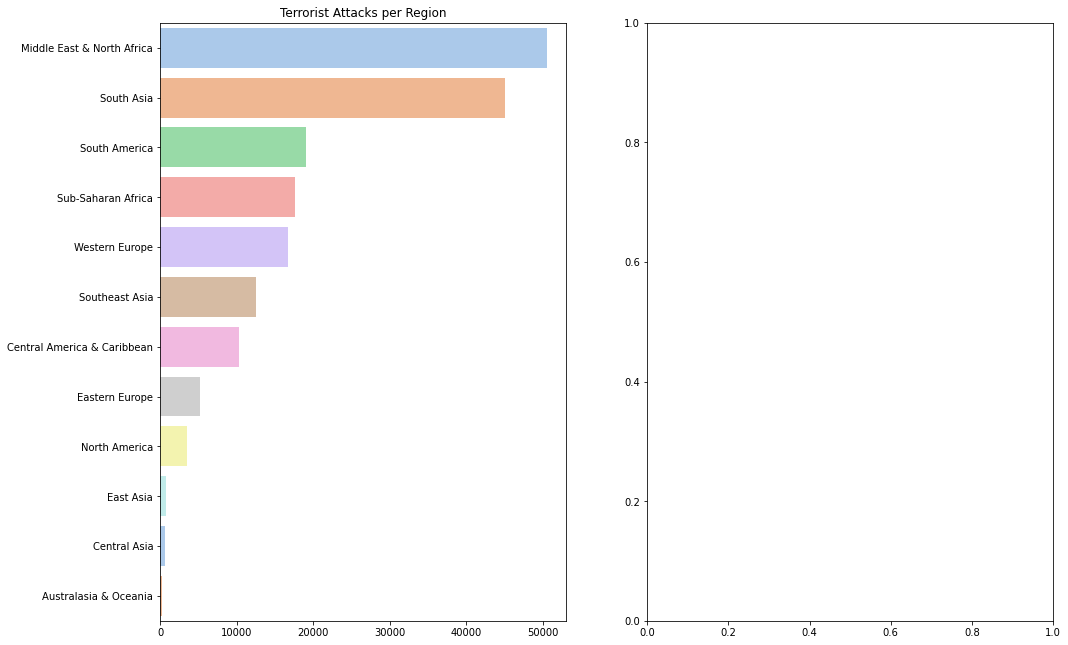

In [87]:
# Terrorist Attacks per region
fig,axes = plt.subplots(figsize=(16,11),nrows=1,ncols=2)
sns.barplot(x=data['region_txt'].value_counts()[:20].values,y=data['region_txt'].value_counts()[:20].index,ax=axes[0],palette='pastel')
axes[0].set_title('Terrorist Attacks per Region')
plt.show()

TypeError: ignored

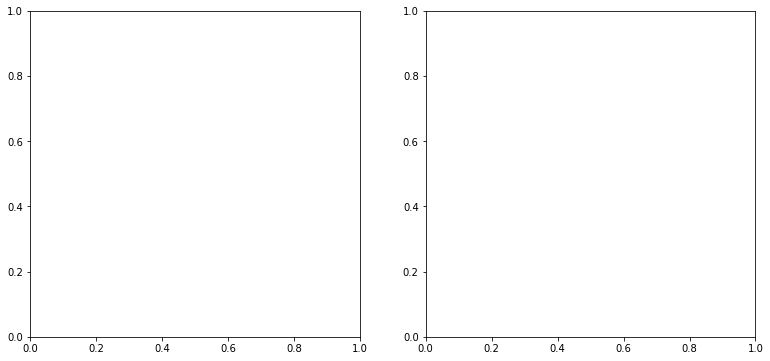

In [88]:
#Type of Attack region wise
fig,axes=plt.subplots(figsize=(13,6),nrows=1,ncols=2)
sns.barplot(x=data['region_txt'].value_counts().index,y=data['attacktype1_txt'],order=data['attacktype1_txt'].value_counts().index,palette='hot')
plt.xticks(rotation=90)
plt.xlabel('Region')
ply.ylabel('attack type')
plt.title('type of attack')
plt.show()